In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


 **Importing the libraries**

In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import  KNNImputer
from sklearn.metrics import accuracy_score

In [3]:
train_read = pd.read_csv("/kaggle/input/titanic/train.csv")
train_read

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_read.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


so the information we get from this is 
* total number of passanger are 891 
* on an avarage 52% of passangers are either siblings or spauses 
* the avarage age of passanger is 29~30 years
* on an avarage 38% of passangers are parant and children 
* the avarage fare of is of 32$ USD

* the madian of class is 3rd class which is more commen among poor people or middle class people 
* only 25% of people bought the 2nd class ticket 
* only few people bought the 1st class ticket 
* the max age is 80 years and min age is 14 years 
* the most expensive ticket was 513$ 

* and chipest was 7$

* the avarage fare of the ship was 32 $ 


In [5]:
train_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from above we can say that 
* we have total 13 columns 
* out of which 5 of the object type (strins_info)
* and 10 are int and float type (numeric_info)

In [6]:
df=pd.DataFrame(train_read)

In [7]:
train_read.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* there are 177 entries in age are null or nan type 177/891 i,e. 19.8%
* and 687 /891 i,e. 77.1% entries in cabin class 


coclusion: the cabin class has very less data to make imputaion so we will be droping this column

# **Data Ploting**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Survived'}>]], dtype=object)

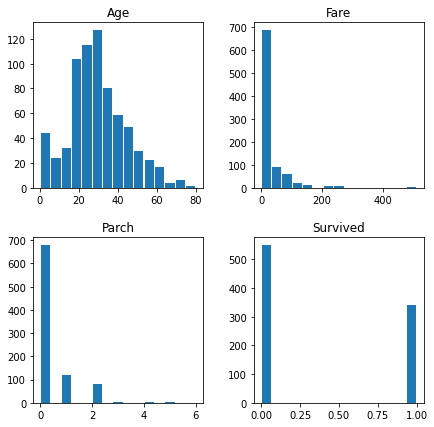

In [8]:
train_read.hist(column=['Age','Fare','Parch','Survived'],figsize=(7,7),grid=False,bins=15,zorder=2,rwidth=0.9,)

from above histograms we can see that the distribution of age,fare,parch,Survived


## plot some combine histograms to see relation of survived class to the other classes 

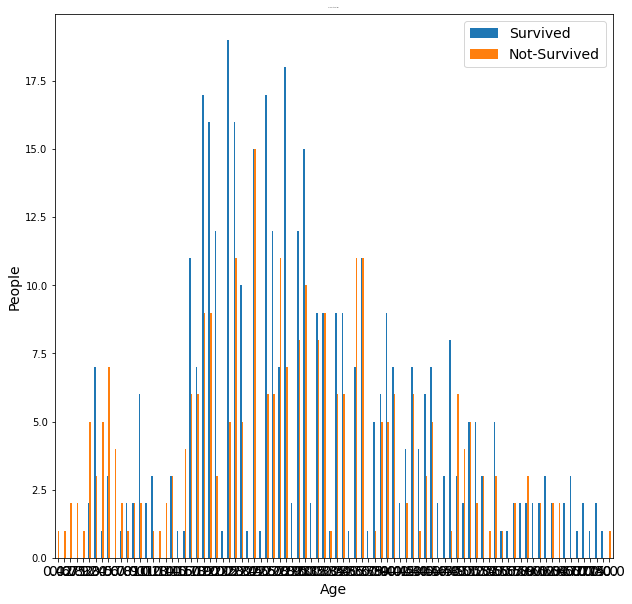

In [9]:
pd.crosstab(train_read['Age'],train_read['Survived']).plot(kind='bar',figsize=(10,10))
plt.legend(['Survived','Not-Survived'],fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('People',fontsize=14)
plt.xticks(rotation=0,fontsize=14)
plt.title('Survivel rate by Age', fontsize=0)
plt.show()

now survivel by parch


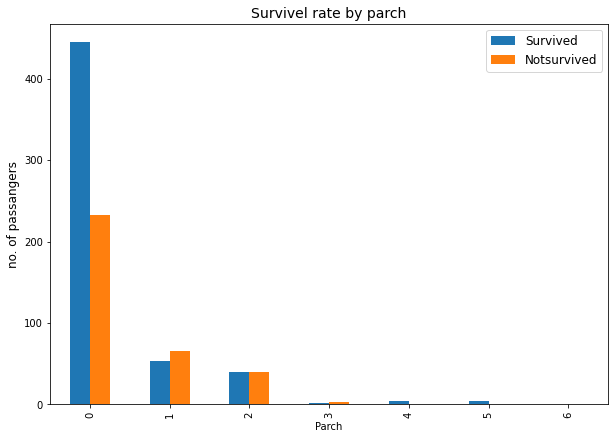

In [10]:
pd.crosstab(train_read['Parch'],train_read['Survived']).plot(kind='bar',figsize=(10,7))
plt.ylabel('no. of passangers',fontsize=12)
plt.legend(['Survived','Notsurvived'],fontsize=12)
plt.title('Survivel rate by parch', fontsize=14)
plt.show()


<AxesSubplot:xlabel='Sex'>

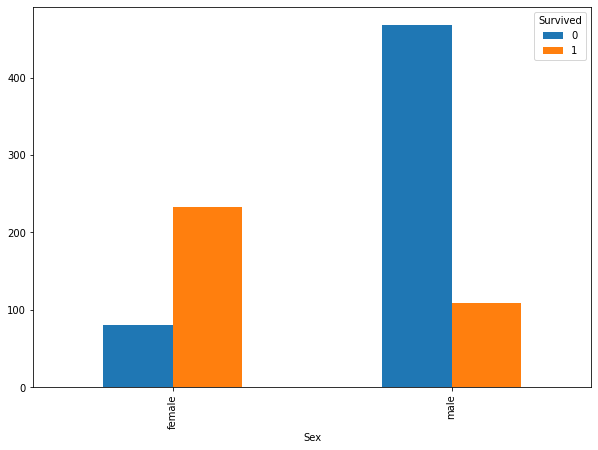

In [11]:
pd.crosstab(train_read['Sex'],train_read['Survived']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='Pclass'>

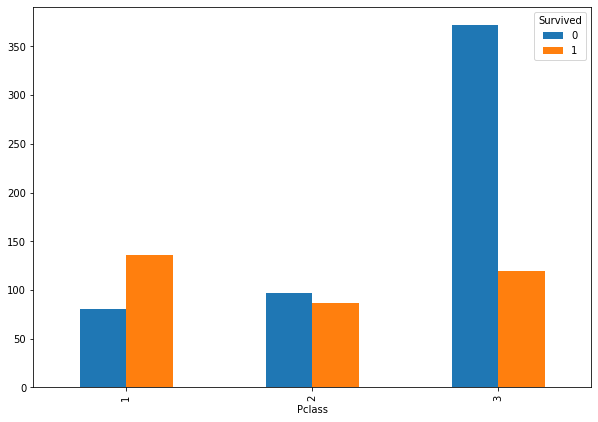

In [12]:
pd.crosstab(train_read['Pclass'],train_read['Survived']).plot(kind='bar',figsize=(10,7))

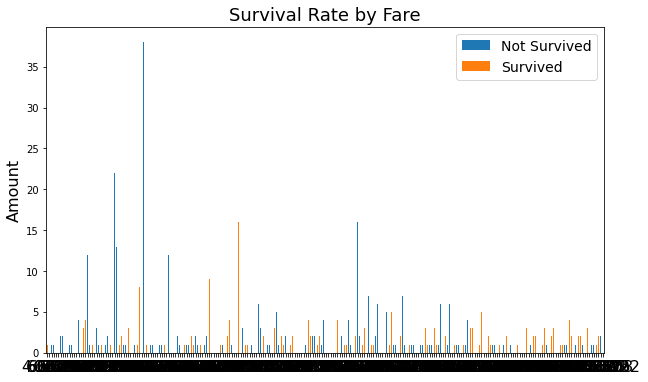

In [13]:
categories = ['Cheap', 'Standard', 'High', 'Expensive']
pd.crosstab(df['Fare'], df['Survived']).plot(kind='bar',  figsize=(10,6))
plt.legend(['Not Survived', 'Survived'],fontsize=14)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=16)
plt.title('Survival Rate by Fare', fontsize=18)
plt.show()

In [14]:
train_read

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* As we saw above there more than 70% entries are missing in the cabin class
* ticlet class has alpha-numeric data which is redundunt as fare corresponds the same idea of class of people 
* In survivel the names of the passengers are inconsequential 
so will drop these column from our data set entirely

In [15]:
x =train_read.drop(columns=['Survived','Name','Ticket','Cabin'],axis=1)
y_train=train_read['Survived']
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,NaN,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [16]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
x_train=pd.get_dummies(x)
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=42)
len(x_train),len(x_test), len(y_train),len(y_test)

(712, 179, 712, 179)

In [19]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [20]:
impute = KNNImputer()
x_train=pd.DataFrame(impute.fit_transform(x_train),columns=x_train.columns)
x_test= pd.DataFrame(impute.fit_transform(x_test),columns=x_test.columns)
x_test['PassengerId']

0      710.0
1      440.0
2      841.0
3      721.0
4       40.0
       ...  
174    434.0
175    774.0
176     26.0
177     85.0
178     11.0
Name: PassengerId, Length: 179, dtype: float64

In [21]:
log_reg = LogisticRegression(verbose=1,max_iter=200)
log_reg.fit(x_train,y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93521D+02    |proj g|=  3.76765D+04

At iterate   50    f=  3.33552D+02    |proj g|=  2.75404D+03

At iterate  100    f=  3.22589D+02    |proj g|=  1.51238D+02

At iterate  150    f=  3.21474D+02    |proj g|=  1.42391D+02

At iterate  200    f=  3.21098D+02    |proj g|=  9.81318D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    200    235      1     0     0   9.813D+00   3.211D+02
  F =   321.09822087253525     

STOP: T

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=200, verbose=1)

In [22]:
y_pred=log_reg.predict(x_test)
pd.DataFrame(y_pred,columns=y_test.columns)

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,0
177,1


In [23]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8044692737430168

In [24]:
score = cross_val_score(log_reg,x_train,y_train,cv=5)
score.mean()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94401D+02    |proj g|=  3.17835D+04


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/opt/conda/lib/python3.7/site


At iterate   50    f=  2.65571D+02    |proj g|=  1.70690D+01

At iterate  100    f=  2.60437D+02    |proj g|=  4.95263D+01

At iterate  150    f=  2.60246D+02    |proj g|=  6.48425D+01

At iterate  200    f=  2.59909D+02    |proj g|=  2.10695D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    200    239      1     0     0   2.107D+01   2.599D+02
  F =   259.90883371160027     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  2.71137D+02    |proj g|=  1.22626D+03

At iterate  100    f=  2.61453D+02    |proj g|=  2.80597D+01

At iterate  150    f=  2.61108D+02    |proj g|=  4.35515D+02

At iterate  200    f=  2.60782D+02    |proj g|=  5.54955D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    200    242      1     0     0   5.550D+00   2.608D+02
  F =   260.78190305298006     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.7906530089628682

In [25]:
output = pd.DataFrame({'PassengerId': x_test['PassengerId'],'Survived':y_pred})
output

,PassengerId,Survived
0,710.0,0
1,440.0,0
2,841.0,0
3,721.0,1
4,40.0,1
...,...,...
174,434.0,0
175,774.0,0
176,26.0,0
177,85.0,1


In [26]:
test_read=pd.read_csv('/kaggle/input/titanic/test.csv')
test_read

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
test=test_read.drop(columns=['Name','Ticket','Cabin'])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [28]:
test = pd.get_dummies(test)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,NaN,0,0,8.0500,0,1,0,0,1


In [29]:
test=pd.DataFrame(impute.fit_transform(test),columns=x_train.columns)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,22.5,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308.0,3.0,22.5,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


predicting on our test data

In [30]:
y_pred=log_reg.predict(test)
pd.DataFrame(y_pred,columns=y_test.columns)

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [31]:
output = pd.DataFrame({'PassengerId': test["PassengerId"],'Survived':y_pred})
output

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,0
3,895.0,0
4,896.0,1
...,...,...
413,1305.0,0
414,1306.0,1
415,1307.0,0
416,1308.0,0


In [32]:
output['PassengerId'] = test["PassengerId"].astype("Int32")

In [33]:
output.to_csv('Submission.csv',index=False)